In [2]:
#importer les bibliothèges
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from google.colab import drive

In [19]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/datapfe.xlsx")
data.columns = ["area","room","city","year","efficiency_class","Category","model","basement","fitted_kitchen","terrasse","equipment","price"]
data.drop(data.index[data['room'] == 'k.A.'], inplace=True)
data.drop(data.index[data['Category'] == 'Gewerbeflächen'], inplace=True)

print(data.iloc["room",1])


data.loc[data["model"].str.contains('Neubau') | data["model"].str.contains('renoviert') | data["model"].str.contains('gehoben')  | data["model"].str.contains('Erstbezug'), "model"] = "new"
data.loc[data["model"].str.contains('renovierungsbedürftig') | data["model"].str.contains('sanierungsbedürftig') | data["model"].str.contains('entkernt') | data["model"].str.contains('Altbau') | data["model"].str.contains('baufällig'), "model"] = "old"
data.loc[data["model"].str.contains('gepflegt') | data["model"].str.contains('saniert') | data["model"].str.contains('projektiert') | data["model"].str.contains('teilsaniert'), "model"] = "middle"

data.loc[data["Category"].str.contains('Doppelhaus') | data["Category"].str.contains('Doppelhaus') | data["Category"].str.contains('Bauernhaus'), "Category"] = "Doppelhaushälfte"
data["room"] = data["room"].astype(float)
print(data.dtypes)

ValueError: ignored

In [43]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:11] # les caractéristiques
y = data.iloc[:,11] # les résultats (classes)
X.head()


,area,room,city,year,efficiency_class,Category,model,basement,fitted_kitchen,terrasse,equipment
1,111.0,5,berlin,1912.0,H,Einfamilienhaus,middle,1.0,1.0,1.0,1.0
2,85.0,4,berlin,1958.0,G,Einfamilienhaus,old,1.0,0.0,1.0,1.0
3,118.0,4,berlin,1981.0,D,Doppelhaushälfte,old,0.0,0.0,0.0,0.0
4,80.0,4,berlin,1937.0,H,Einfamilienhaus,middle,1.0,0.0,1.0,0.0
5,120.0,3,berlin,1985.0,E,Einfamilienhaus,old,0.0,1.0,0.0,0.0


In [47]:
pd.get_dummies(data)


,area,year,basement,fitted_kitchen,terrasse,equipment,price,room_10,"room_10,5",room_11,...,Category_Einfamilienhaus,Category_Mehrfamilienhaus,Category_Reihenendhaus,Category_Reihenmittelhaus,Category_Stadthaus,Category_Villa,Category_Zweifamilienhaus,model_middle,model_new,model_old
1,111.0,1912.0,1.0,1.0,1.0,1.0,695000.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,85.0,1958.0,1.0,0.0,1.0,1.0,995000.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,118.0,1981.0,0.0,0.0,0.0,0.0,649000.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,80.0,1937.0,1.0,0.0,1.0,0.0,520000.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,120.0,1985.0,0.0,1.0,0.0,0.0,990000.0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,167.0,1968.0,0.0,0.0,0.0,0.0,589000.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
752,80.0,1949.0,1.0,1.0,1.0,1.0,279000.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
753,428.0,1902.0,0.0,0.0,0.0,1.0,1428500.0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
754,163.0,1900.0,0.0,1.0,0.0,0.0,670000.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('model', OneHotEncoder(), [6])], remainder = 'passthrough')

In [37]:
X = ct.fit_transform(X)
X

ValueError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=4, n_informative=2,
                        random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)


RandomForestRegressor(max_depth=2, random_state=0)

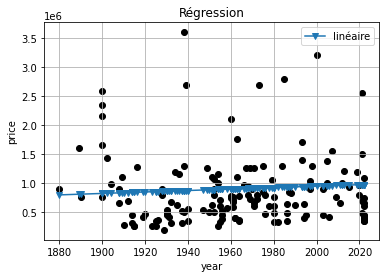

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_test["year"], y_test, color="black")
new_x, new_y = zip(*sorted(zip(X_test["year"], y_pred)))
plt.plot(new_x, new_y,"v-")
plt.legend([u"linéaire"])
plt.xlabel("year")
plt.ylabel("price")
plt.title(u"Régression")
plt.grid()
plt.show()